### Image classification with MNIST dataset

In [7]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
# load and preprocess data

# load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to a range 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# Build the model

model = Sequential([
    Flatten(input_shape=(28, 28)), # Flatten the input
    Dense(128, activation='relu'), # Fully connectd with ReLU activation
    Dense(10, activation='softmax') # Output layer with softmax activation 
])

In [12]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8754 - loss: 0.4322 - val_accuracy: 0.9587 - val_loss: 0.1422
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.9654 - loss: 0.1167 - val_accuracy: 0.9696 - val_loss: 0.1006
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9775 - loss: 0.0770 - val_accuracy: 0.9740 - val_loss: 0.0875
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.9829 - loss: 0.0560 - val_accuracy: 0.9754 - val_loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.9867 - loss: 0.0432 - val_accuracy: 0.9746 - val_loss: 0.0829
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.9898 - loss: 0.0338 - val_accuracy: 0.9751 - val_loss: 0.0868
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.9923 - loss: 0.0258 - val_accuracy: 0.9762 - val_loss: 0.0826
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.9930 - l

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.9711 - loss: 0.1133
Test accuracy: 0.9729999899864197


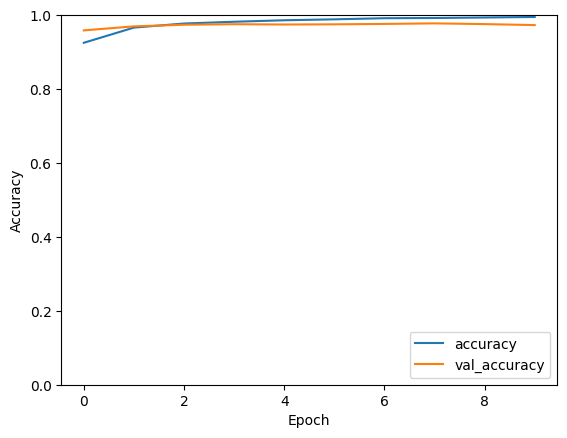

In [15]:
# Plot training history

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [16]:
# Save the model
model.save('mnist_model.h5')